In [15]:
import os
import trimesh
import matplotlib.pyplot as plt
import trimesh.exchange
import trimesh.exchange.gltf

def cargar_modelo(ruta_archivo):
    """
    Carga un modelo 3D desde un archivo OBJ
    """
    try:
        mesh = trimesh.load(ruta_archivo)
        print(f"Modelo cargado correctamente: {ruta_archivo}")
        return mesh
    except Exception as e:
        print(f"Error al cargar el modelo: {e}")
        return None

def convertir_y_guardar(mesh, ruta_original, formato_destino):
    """
    Convierte y guarda el modelo en el formato especificado
    """
    if mesh is None:
        return False
    
    try:
        # Crear directorio de salida si no existe
        directorio_base = os.path.dirname(ruta_original)
        nombre_archivo = os.path.splitext(os.path.basename(ruta_original))[0]
        ruta_destino = os.path.join(directorio_base, f"{nombre_archivo}.{formato_destino}")
        
        # Guardar en el formato especificado
        if formato_destino == "stl":
            trimesh.exchange.stl.export_stl(mesh)
        elif formato_destino == "glft":
            trimesh.exchange.gltf.export_gltf(mesh)
            
        print(f"Modelo guardado como {ruta_destino}")
        return True
    except Exception as e:
        print(f"Error al convertir a {formato_destino}: {e}")
        return False

# Ruta del archivo BJ a cargar
ruta_obj = "./man.obj"

if os.path.exists(ruta_obj) and ruta_obj.lower().endswith('.obj'):
    # Cargar el modelo
    mesh = cargar_modelo(ruta_obj)
    
    if mesh is not None:
        # Convertir a STL
        convertir_y_guardar(mesh, ruta_obj, 'stl')
        
        # Convertir a GLTF
        convertir_y_guardar(mesh, ruta_obj, 'gltf')
        
    else:
        print("No se pudo procesar el modelo.")
else:
    print("La ruta proporcionada no existe o no es un archivo OBJ válido.")

Modelo cargado correctamente: ./man.obj
Modelo guardado como .\man.stl
Modelo guardado como .\man.gltf


Visualizando y analizando modelos en diferentes formatos:

Visualizando modelo en formato OBJ:


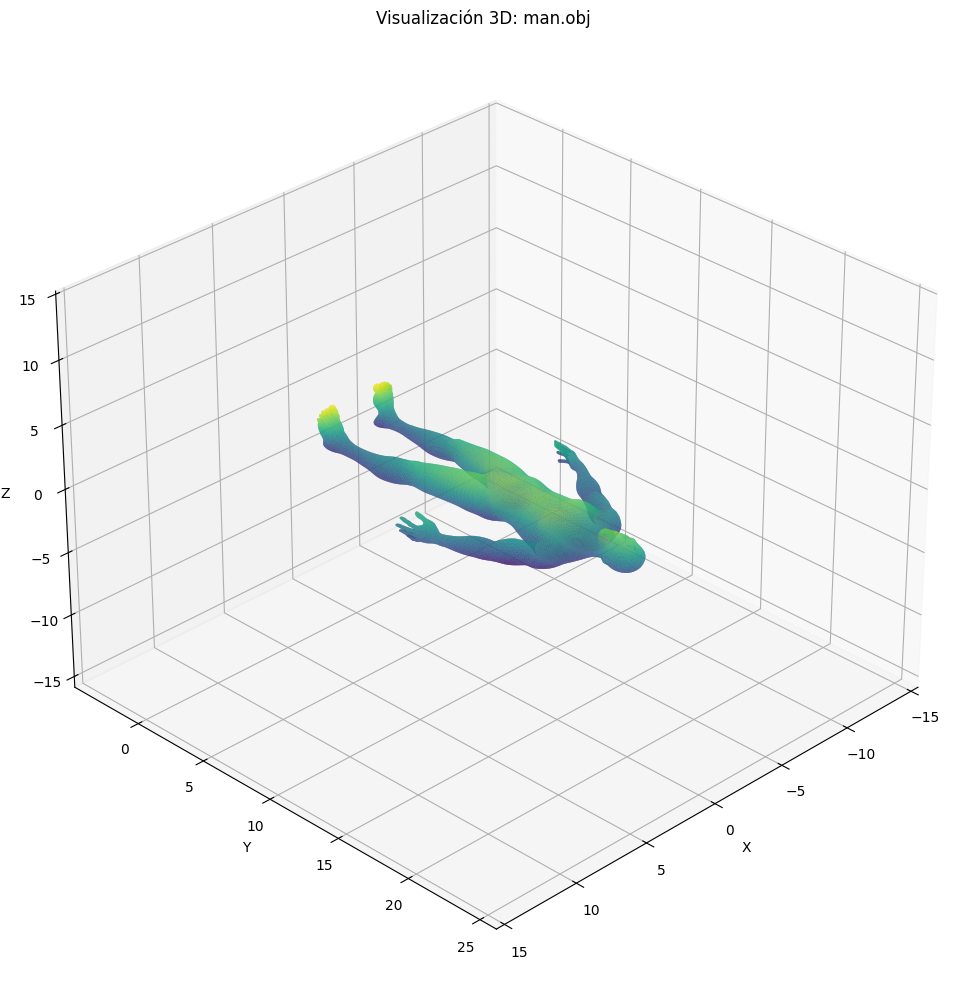

Modelo visualizado correctamente: ./man.obj

Visualizando modelo en formato STL:


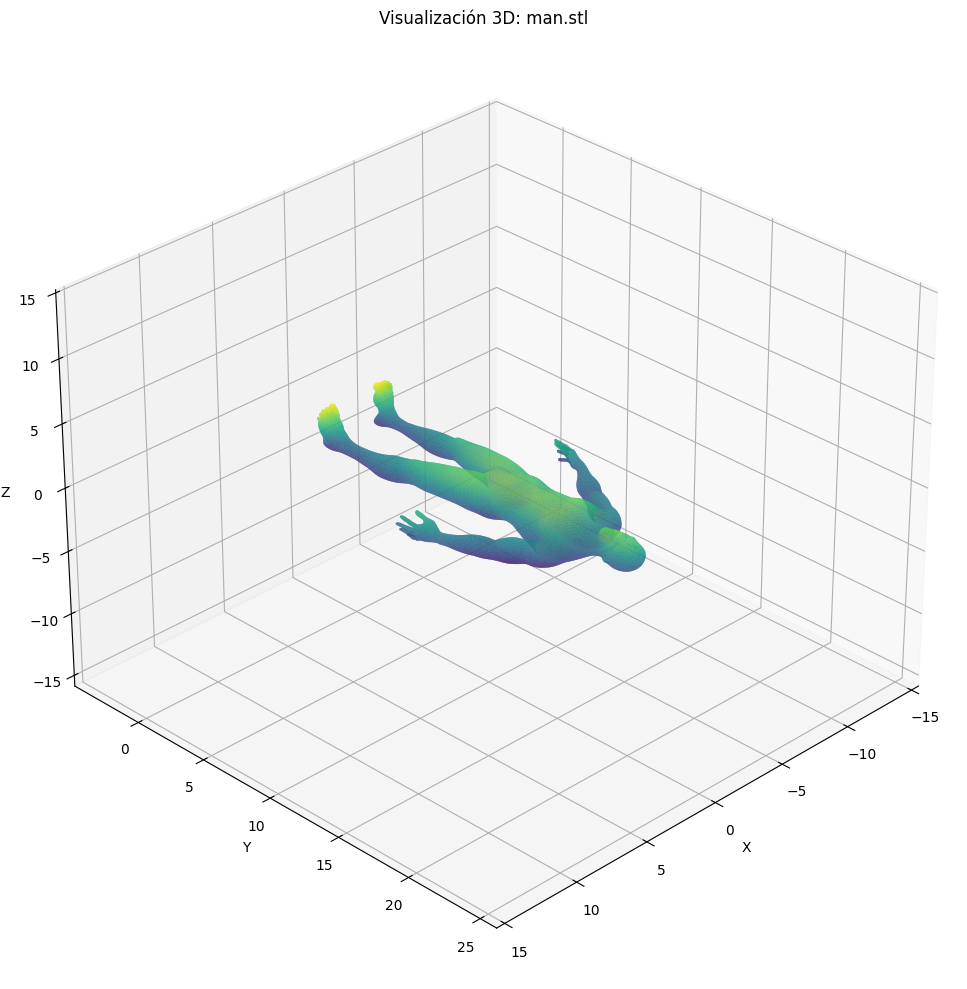

Modelo visualizado correctamente: ./man.stl

Visualizando modelo en formato GLTF:


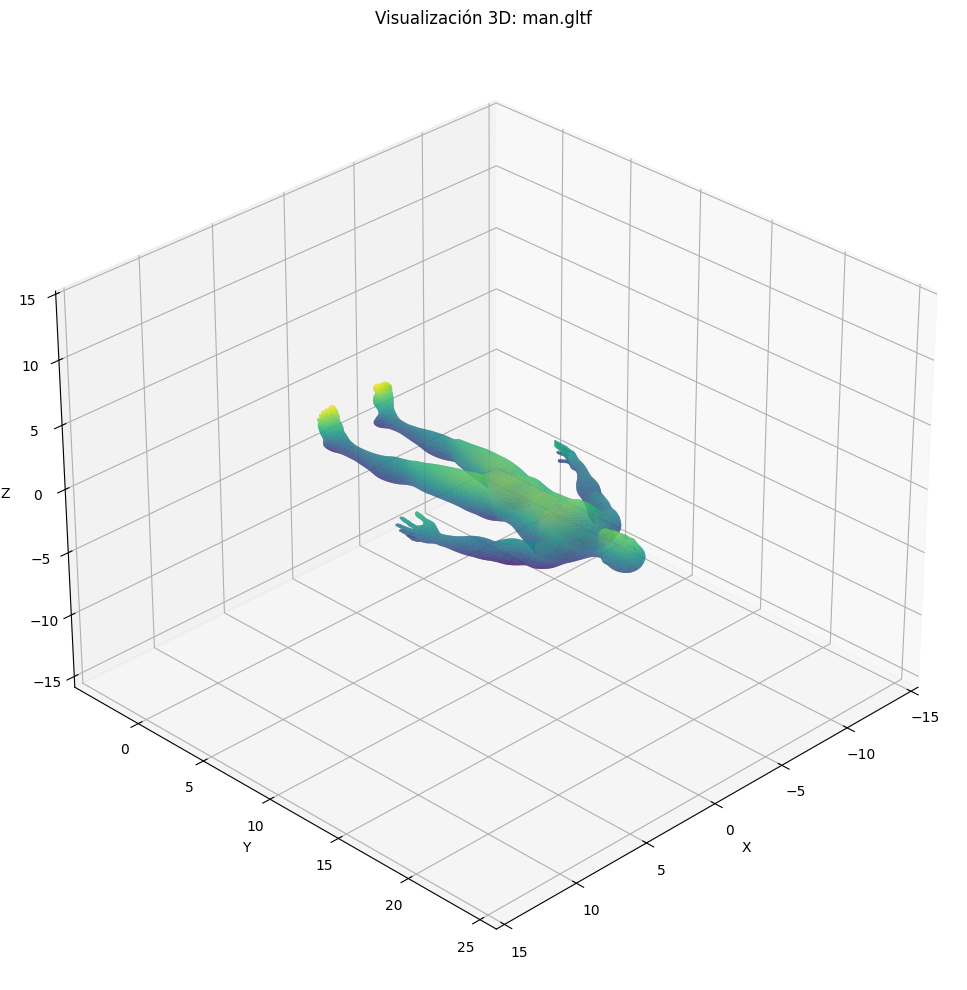

Modelo visualizado correctamente: ./man.gltf


--- COMPARATIVA DE PROPIEDADES DE MODELOS 3D ---
Archivo  | Vértices | Caras | Normales | Duplicados | Volumen | Área  
----------------------------------------------------------------------
man.obj  | 24461    | 48918 | 48918    | True       | 120.08  | 267.18
man.stl  | 24461    | 48918 | 48918    | True       | 120.08  | 267.18
man.gltf | 24461    | 48918 | 48918    | True       | 120.08  | 267.18


In [16]:
# Función para visualizar modelos 3D
def visualizar_modelo_3d(ruta_archivo):
    """
    Visualiza un modelo 3D en formato OBJ, STL o GLTF
    
    Args:
        ruta_archivo: Ruta al archivo 3D a visualizar
    """
    # Verificar que el archivo existe
    if not os.path.exists(ruta_archivo):
        print(f"El archivo {ruta_archivo} no existe")
        return None
    
    # Verificar que el formato es compatible
    extension = os.path.splitext(ruta_archivo)[1].lower()
    if extension not in ['.obj', '.stl', '.gltf', '.glb']:
        print(f"Formato {extension} no soportado. Use .obj, .stl, .gltf o .glb")
        return None
    
    try:
        # Cargar el modelo
        mesh = trimesh.load(ruta_archivo)
        
        # Crear figura y ejes 3D
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        
        # Manejar diferentes tipos de objetos que puede devolver trimesh.load
        if isinstance(mesh, trimesh.Scene):
            # Para archivos GLTF que se cargan como escenas
            # Extraer la geometría de la escena
            geometrías = list(mesh.geometry.values())
            if len(geometrías) > 0:
                # Usar la primera geometría disponible
                mesh = geometrías[0]
            else:
                print("La escena no contiene geometrías visualizables")
                return None
        
        # Obtener los vértices y caras del modelo
        vertices = mesh.vertices
        faces = mesh.faces
        
        # Calcular el centro y la escala del modelo para ajustar la vista
        centro = mesh.centroid
        escala = max(mesh.extents) * 1.5
        
        # Configurar los límites de los ejes basados en el centro y la escala
        ax.set_xlim(centro[0] - escala/2, centro[0] + escala/2)
        ax.set_ylim(centro[1] - escala/2, centro[1] + escala/2)
        ax.set_zlim(centro[2] - escala/2, centro[2] + escala/2)
        
        # Visualizar el modelo como una malla de triángulos
        ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                        triangles=faces, cmap='viridis', alpha=0.8, edgecolor='none')
        
        # Configurar etiquetas y título
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Visualización 3D: {os.path.basename(ruta_archivo)}')
        
        # Ajustar la vista para una mejor visualización
        ax.view_init(elev=30, azim=45)
        
        # Mostrar la figura
        plt.tight_layout()
        plt.show()
        
        print(f"Modelo visualizado correctamente: {ruta_archivo}")
        return mesh
        
    except Exception as e:
        print(f"Error al visualizar el modelo: {e}")
        return None

def analizar_propiedades_modelo(mesh, nombre_archivo):
    """
    Analiza las propiedades de un modelo 3D
    
    Args:
        mesh: Objeto mesh de trimesh
        nombre_archivo: Nombre del archivo para identificación
    
    Returns:
        dict: Diccionario con las propiedades del modelo
    """
    if mesh is None:
        return None
    
    # Extraer la geometría si es una escena
    if isinstance(mesh, trimesh.Scene):
        geometrías = list(mesh.geometry.values())
        if len(geometrías) > 0:
            mesh = geometrías[0]
        else:
            return None
    
    # Recopilar propiedades
    propiedades = {
        'Archivo': nombre_archivo,
        'Vértices': len(mesh.vertices),
        'Caras': len(mesh.faces),
        'Normales': len(mesh.face_normals),
        'Duplicados': mesh.is_watertight,
        'Volumen': round(mesh.volume, 2) if mesh.is_watertight else 'N/A',
        'Área': round(mesh.area, 2)
    }
    
    return propiedades

# Comparar modelos en diferentes formatos
formatos_disponibles = ['obj', 'stl', 'gltf']
print("Visualizando y analizando modelos en diferentes formatos:")

# Lista para almacenar propiedades de cada modelo
propiedades_modelos = []

for formato in formatos_disponibles:
    ruta_archivo = f"./man.{formato}"
    if os.path.exists(ruta_archivo):
        print(f"\nVisualizando modelo en formato {formato.upper()}:")
        mesh = visualizar_modelo_3d(ruta_archivo)
        
        if mesh is not None:
            # Analizar propiedades
            props = analizar_propiedades_modelo(mesh, os.path.basename(ruta_archivo))
            if props:
                propiedades_modelos.append(props)
    else:
        print(f"No se encontró el archivo en formato {formato.upper()}")

# Mostrar tabla comparativa de propiedades
if propiedades_modelos:
    print("\n\n--- COMPARATIVA DE PROPIEDADES DE MODELOS 3D ---")
    
    # Crear encabezados de la tabla
    headers = list(propiedades_modelos[0].keys())
    
    # Calcular el ancho máximo para cada columna
    widths = [max(len(str(prop[header])) for prop in propiedades_modelos) for header in headers]
    widths = [max(w, len(header)) for w, header in zip(widths, headers)]
    
    # Imprimir encabezados
    header_row = " | ".join(f"{header:<{width}}" for header, width in zip(headers, widths))
    print(header_row)
    print("-" * len(header_row))
    
    # Imprimir filas de datos
    for prop in propiedades_modelos:
        row = " | ".join(f"{str(prop[header]):<{width}}" for header, width in zip(headers, widths))
        print(row)
else:
    print("No se pudieron analizar los modelos.")
